In [1]:
using Zygote
using LinearAlgebra, Distributions, Random, Statistics, SpecialFunctions
using Plots, JLD

pyplot()

Plots.PyPlotBackend()

In [2]:
include("F:/Tue/Thesis/codes/GP_CVI/Training_FITC.jl") #remember to change the path to "Training_FITC.jl"
include("F:/Tue/Thesis/codes/GP_CVI/FITC.jl") # remember to change the path to "FITC.jl"

FITC_online_update (generic function with 2 methods)

In [3]:
Random.seed!(1976) ;
true_process(x) = 2*sin(x) + cos(x)^2; #x is scalar

N_obser = 150; #number of observations
x_train = rand(1:0.01:200,(1,N_obser)); #training points (1xN)
y_train = Vector{Float64}(undef, N_obser); #observed values
for i=1:N_obser
    y_train[i] = true_process(x_train[i])
end

U = 50; #number of inducing points
x_induc = rand(1:0.01:200,(1,U)); #inducing point

In [4]:
#hyper-parameters for GP
σ, l = 2, 1.5;
#Now, find the posterior of inducing points
μ_u, Σ_u = FITC_post_indu(x_train, x_induc, y_train, σ, l)

([0.3823062778464816, 0.5279856654168534, 2.0785373635320665, 1.66392384988489, 1.6967006255709909, -0.27357825268663105, 1.3629928265316698, -0.31590152666948385, -1.8652614923432418, -1.1389550406576097  …  1.949065983074731, -0.8690006240466064, -0.915535968720075, -0.8794982361915267, 0.28847361633519303, 0.3427409769107105, 3.3324238662195413, 1.9472285101016023, 0.44435051885053195, -1.7687669781697792], [0.7265648977198439 -2.882666797713932e-38 … 1.0059966943430026e-39 -5.4225592390678656e-48; -2.88266679769657e-38 3.2916267286183043 … 0.6135921598019516 -1.0131289772022376e-10; … ; 1.0059966943363339e-39 0.6135921598019519 … 2.5865277574193972 9.405825737852409e-10; -5.422559315593186e-48 -1.0131289907196719e-10 … 9.40582590661253e-10 1.3932996512876479])

In [36]:
#Now perform prediction on new points
x_test = rand(1:100,(1,1));
μ_predict, σ_predict = FITC_predict(x_induc,x_test,μ_u,Σ_u,σ,l);
println("New points:",x_test)
println("Predicted valued:", μ_predict[1])
println("uncertainty:",σ_predict[1])
println("True value:",true_process(x_test))

#of course, this result is not so correct 'cause we've not optimized parameters yet

New points:[68]
Predicted valued:0.5652154643622627
uncertainty:0.19274599810048398
True value:[-1.6021294811266324]


In [6]:
neg_llh(x_train,x_induc,y_train,σ,l)

118.80426909130264

In [7]:
Xu_op, σ_op, l_op, μ_u, Σ_u, llh_val = train_FITC(x_train, x_induc, y_train, σ, l, 1e-4, 35000)

([21.359889175639232 118.16571236373949 … 121.09076210983122 162.62140322931072], 1.5784449909169307, 1.2935071745580724, [1.6836960059239403, 0.3726460073945605, 1.9087900196398069, 1.8416227408091543, 1.590644228675417, -0.36539772857260616, 2.0113950540432834, -1.2316277020639796, -1.3013813771327198, 2.204924272942174  …  1.9714481619897877, -0.3896406866733172, -0.11216723679923693, 1.9574098985751605, 1.0774319839192752, 1.910538945767784, 0.7720136358594373, 1.7393477472260797, 0.3754544031821344, -1.1537587650768855], [0.026745518690985685 -2.43746923250793e-60 … 3.966830363177384e-62 -1.07678619669306e-74; -2.4374692325573184e-60 2.2189632950542797 … 0.19349164326532037 -1.163607450924519e-15; … ; 3.966830363261128e-62 0.19349164326532037 … 1.8868342348446745 2.4264792096238542e-15; -1.0767861969424707e-74 -1.1636074511795098e-15 … 2.426479208084755e-15 1.527079267740084], 56.356836876655734)

In [21]:
μ_u_op, Σ_u_op = FITC_post_indu(x_train, Xu_op, y_train, σ_op, l_op); #optimal posterior of inducing points

In [37]:
# Predict with optimal parameters
μ_predict_new, σ_predict_new = FITC_predict(Xu_op,x_test,μ_u_op,Σ_u_op,σ_op,l_op);
println("New points:",x_test)
println("Predicted valued (after optimizing):", μ_predict_new[1])
println("uncertainty (after optimizaing):",(σ_predict_new)[1])
println("True value:",true_process(x_test))

New points:[68]
Predicted valued (after optimizing):-1.2741168106390273
uncertainty (after optimizaing):0.18712541656709325
True value:[-1.6021294811266324]


### Plots

In [23]:
N = length(1:0.5:200);
x_axis = Matrix{Float64}(undef,1,N)
count = 1
for i=1:0.5:200
    x_axis[count] = i;
    count += 1;
end


In [24]:
y_mean, var_pre = FITC_predict(Xu_op,x_axis,μ_u_op,Σ_u_op,σ_op,l_op)

([-0.02061000932811796, -0.061909121244017026, -0.16071992719467554, -0.36019216671427295, -0.6953669185542591, -1.15158869551523, -1.62243454130323, -1.9106397788136078, -1.803873131618955, -1.2010665796030968  …  0.007609424371540392, 0.0022784842537336017, 0.0005906419602343359, 0.000132521797229087, 2.5732761452547513e-5, 4.324119215935946e-6, 6.287954886023335e-7, 7.912540386692593e-8, 8.616173203418643e-9, 8.119017646479741e-10], [2.7995982410358295 2.603833052023042 … -1.2095351891906552e-112 -1.1397483778151565e-113; 2.603833052023042 2.7978414674393384 … -3.627583475247921e-112 -3.418282013001585e-113; … ; -1.2095351890202558e-112 -3.627583474736868e-112 … 2.799816665747551 2.604489886394023; -1.1397483776545888e-113 -3.4182820125200185e-113 … 2.604489886394023 2.799816665747551])

In [25]:
σ_posterior = sqrt.(diag(var_pre))

399-element Array{Float64,1}:
 1.6732000003095355
 1.6726749437470922
 1.6692661123452628
 1.6529210115657111
 1.594929660268306
 1.441161680385442
 1.1311730059333227
 0.648537934114682
 0.07339865539169009
 0.45258388600085026
 0.7261264270071676
 0.6510881330184167
 0.2564727753013116
 ⋮
 1.6708708772640197
 1.672881816951295
 1.6732192730966946
 1.6732611389107392
 1.6732649926917855
 1.6732652565896533
 1.6732652700576676
 1.6732652705705893
 1.6732652705851803
 1.6732652705854905
 1.6732652705854953
 1.6732652705854953

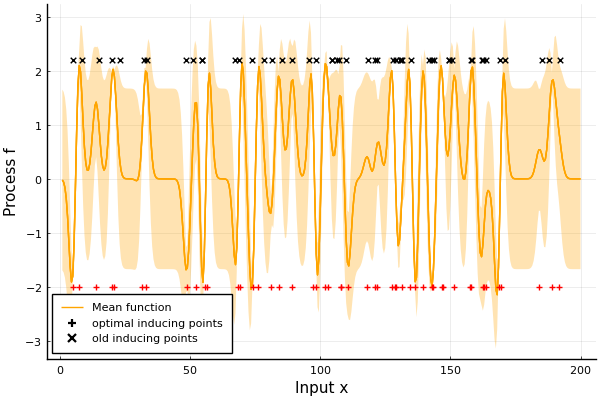

In [26]:
plot(1:0.5:200,y_mean,label="Mean function",color="orange")
plot!(1:0.5:200,y_mean,label=false,fillrange=y_mean - σ_posterior, fillalpha=.3, c = :orange)
plot!(1:0.5:200,y_mean,label=false,fillrange=y_mean + σ_posterior, fillalpha=.3, c = :orange)

scatter!(Xu_op[:],-2 .+ zeros(length(Xu_op[:])), label="optimal inducing points", marker =:+, color="red")
scatter!(x_induc[:],2.2 .+ zeros(length(Xu_op[:])), label="old inducing points", marker =:x, color="black")
xlabel!("Input x")
ylabel!("Process f")



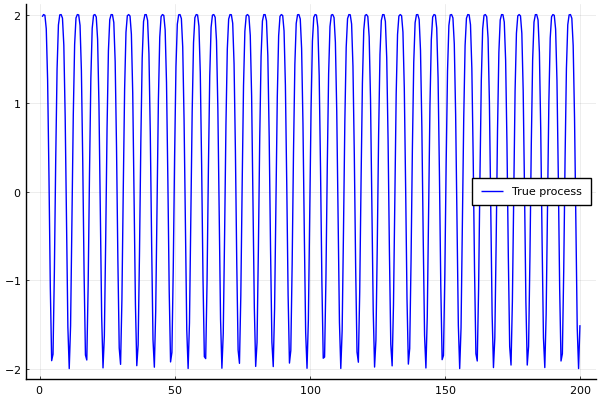

In [73]:
x_true = collect(1:0.5:200);
y_true = true_process.(x_true);
plot(x_true,y_true,label="True process",color="blue")

In [27]:
#store optimal values
save("F:\\Tue\\Thesis\\codes\\GP_CVI\\optimal_params.jld","params",[Xu_op, σ_op, l_op]);